In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

Reading the dataset

In [2]:
dataset = pd.read_csv('digits.csv')
dataset.columns=['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16', 'output']
dataset.head(5)

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,output
0,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
1,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
2,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
3,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9
4,70,100,100,97,70,81,45,65,30,49,20,33,0,16,0,0,1


Train-test split

In [3]:
train, test = train_test_split(dataset, train_size=0.8, random_state=8)
test.reset_index(drop=True)
xtrain = train.iloc[:, 0:-1]
ytrain = train.iloc[:,-1]
xtest = test.iloc[:, 0:-1]
ytest = test.iloc[:,-1]

## Inspection of the dataset distribution

Output distribution

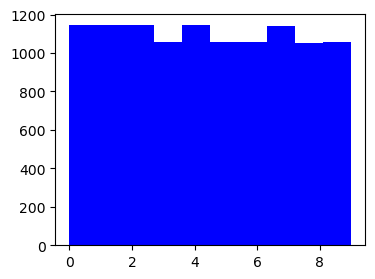

In [4]:
plt.figure(figsize=(4,3))
plot = plt.hist(dataset.output,color='blue')
plt.show()

Feature scaling 

SVM and PCA uses distance based evaluation therefore feature scaling is important.

In [5]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

Text(0, 0.5, 'PC2')

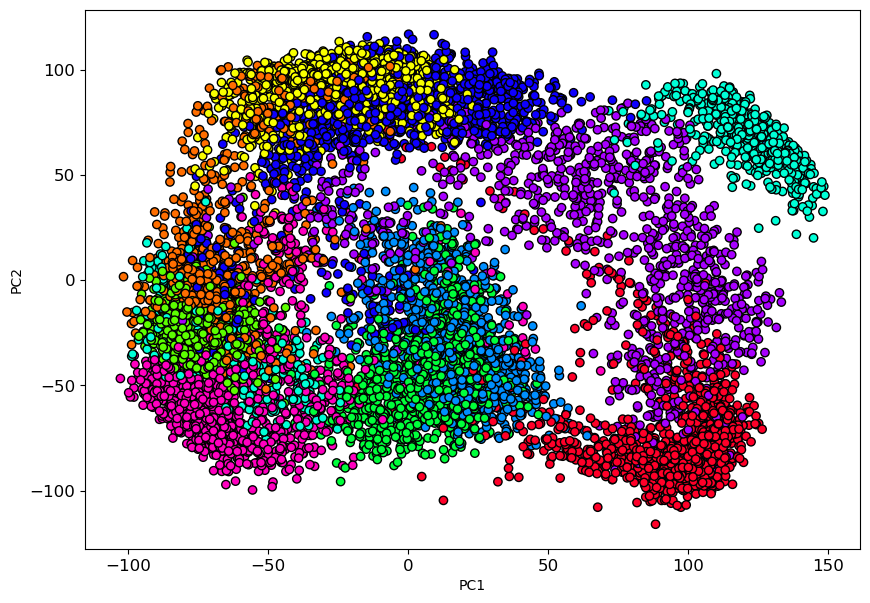

In [6]:
pca = PCA(n_components=2)
dummy_pca = pca.fit_transform(dataset.iloc[:,0:-1])

label_color_dict = {label:idx for idx,label in enumerate(np.unique(dataset.output))}
cvec = [label_color_dict[label] for label in dataset.output]

PC1 = dummy_pca[:,0]
PC2 = dummy_pca[:,1]
plt.figure(figsize=(10,7))

plt.scatter(PC1,PC2 ,c= cvec, cmap='gist_rainbow', edgecolors='#000000')
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

## Support Vector Classifier

RBF kernel

In [7]:
classifier_rbf = SVC(kernel='rbf',random_state=5)
parameters_rbf = { 'C':  [0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
              }

gridsearch_rbf = GridSearchCV(classifier_rbf, param_grid=parameters_rbf, cv=StratifiedKFold(5,shuffle=True))

svc_model = gridsearch_rbf.fit(xtrain, ytrain)

print(gridsearch_rbf.best_params_)

ypred_svc_rbf = gridsearch_rbf.predict(xtest)



{'C': 10, 'gamma': 0.1}


In [8]:
print(classification_report(ytest, ypred_svc_rbf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       233
           2       1.00      1.00      1.00       237
           3       1.00      1.00      1.00       213
           4       1.00      1.00      1.00       223
           5       1.00      0.99      0.99       188
           6       1.00      1.00      1.00       230
           7       1.00      1.00      1.00       221
           8       1.00      1.00      1.00       228
           9       0.98      1.00      0.99       197

    accuracy                           1.00      2199
   macro avg       1.00      1.00      1.00      2199
weighted avg       1.00      1.00      1.00      2199



Polynomial Kernel

In [9]:
classifier_poly = SVC(random_state=73, kernel='poly')
params_poly = {'degree': [2,3,4],
                  'C':  [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],}

gridsearch_poly = GridSearchCV(classifier_poly, param_grid=params_poly, cv=StratifiedKFold(5, shuffle=True))



svc_poly_model = gridsearch_poly.fit(xtrain, ytrain)

print(gridsearch_poly.best_params_)

ypred_svc_poly = gridsearch_poly.predict(xtest)


{'C': 1, 'degree': 3, 'gamma': 0.1}


In [10]:
print(classification_report(ytest, ypred_svc_poly))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       229
           1       1.00      1.00      1.00       233
           2       1.00      1.00      1.00       237
           3       1.00      1.00      1.00       213
           4       1.00      1.00      1.00       223
           5       0.99      0.99      0.99       188
           6       1.00      1.00      1.00       230
           7       1.00      1.00      1.00       221
           8       1.00      1.00      1.00       228
           9       0.98      0.99      0.99       197

    accuracy                           1.00      2199
   macro avg       1.00      1.00      1.00      2199
weighted avg       1.00      1.00      1.00      2199

